# Preprocess Data

In [2]:
!pip install pydicom

     |████████████████████████████████| 1.9 MB 18.1 MB/s eta 0:00:01


In [1]:
from __future__ import print_function
from __future__ import division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import pandas as pd
import copy
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

PyTorch Version:  1.6.0
Torchvision Version:  0.7.0


In [2]:
data1 = pd.read_csv("Radiomics/Kaggle_Pneumonia_Full_BBox_clean_radiomics_table.csv")
data2 = pd.read_csv("Radiomics/Kaggle_Full_BBox_clean_radiomics_table.csv")
data = pd.concat([data1, data2], axis=0, ignore_index=True)

In [4]:
radiomics_features = data.iloc[:,6:]

In [5]:
from sklearn import preprocessing

x = radiomics_features.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
radiomics_features = pd.DataFrame(x_scaled)

In [6]:
df = pd.concat([data.iloc[:,0:5], data.iloc[:,5:6], radiomics_features],axis=1)

In [14]:
df.fillna(0, inplace=True)

In [16]:
df.to_csv("rsna-pneumonia-detection-challenge/fair_102_radiomics_label_BB.csv", index=False)

In [17]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df)

In [18]:
test_df

,patientId,x,y,width,height,Target,0,1,2,3,...,92,93,94,95,96,97,98,99,100,101
2196,3f167f68-6cde-478d-8e78-9ae22529c22f,225.0,303.0,161.0,169.0,1,1.0,1.0,0.0,0.0,...,0.561201,0.269885,0.437913,0.119248,0.005578,0.515336,0.213822,0.190026,0.302395,0.095210
9979,0a35c2fa-9f9e-4157-8deb-8e5d9e69dbc3,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.443697,0.111687,0.359670,0.057087,0.052873,0.187743,0.249575,0.097353,0.093478,0.124076
3829,7bca5ce8-2b0c-4fcb-95b5-f43470092618,136.0,263.0,203.0,285.0,1,1.0,1.0,0.0,0.0,...,0.535896,0.082838,0.505828,0.047683,0.064356,0.064753,0.374603,0.115385,0.097680,0.247328
10462,175d97a4-f76d-4c1b-a5f3-882575b0a304,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.286355,0.148318,0.263839,0.097387,0.026973,0.640611,0.128353,0.084701,0.129726,0.015482
23850,c66dab9f-24b4-40e9-a7b7-6acf1db635f5,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.623651,0.160746,0.450116,0.117970,0.013693,0.252914,0.291789,0.157663,0.225321,0.131146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25844,daa5977a-a1f6-4e3d-9d50-7002d0a3930e,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.552625,0.181586,0.493809,0.034896,0.056185,0.055934,0.508206,0.110834,0.073937,0.308246
28553,f5a39048-3956-4679-bc82-0ae4cce50614,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.651704,0.291508,0.491429,0.114216,0.005706,0.342151,0.251924,0.240270,0.294558,0.152493
21226,a1ec7a04-716f-4053-acd3-2d84dae9e0da,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.583817,0.041571,0.624440,0.061398,0.027862,0.158513,0.217622,0.174698,0.094311,0.160350
557,12fb963d-f74d-4c83-a3d9-c96ee8983ff4,579.0,560.0,227.0,207.0,1,1.0,1.0,0.0,0.0,...,0.315014,0.354461,0.676593,0.042114,0.026437,0.252782,0.433422,0.109499,0.204411,0.225098


In [19]:
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [20]:
train_df

,patientId,x,y,width,height,Target,0,1,2,3,...,92,93,94,95,96,97,98,99,100,101
0,9746c15f-94d1-4528-aff0-8ef02ccccef0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.488126,0.128294,0.532113,0.036381,0.107228,0.241288,0.508648,0.096661,0.177694,0.335507
1,21f2cb9b-e9c8-4056-9e0a-375351806b25,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.693029,0.319840,0.350281,0.099057,0.011024,0.320441,0.360980,0.199321,0.265125,0.236769
2,45072f01-e58d-420f-8db4-5821f711243f,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.686757,0.233117,0.397332,0.131932,0.007085,0.296410,0.228814,0.252685,0.281672,0.137818
3,89fe1bc2-7a5c-468f-8202-fef9fd13eba7,278.0,323.0,140.0,164.0,1,1.0,1.0,0.0,0.0,...,0.513783,0.261592,0.426855,0.066389,0.028870,0.122663,0.377125,0.150714,0.088716,0.237001
4,b6862fc0-31f9-4091-b8b1-256192168a0f,182.0,192.0,293.0,565.0,1,1.0,1.0,0.0,0.0,...,0.470486,0.244505,0.451958,0.073999,0.023219,0.193841,0.315503,0.170782,0.111526,0.225307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22665,5e5128c2-9c38-4e6f-8c4b-de70b885c228,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.686944,0.291254,0.429476,0.110174,0.010159,0.232497,0.303573,0.214036,0.294781,0.186954
22666,5599f969-ae9a-4a2c-8a0b-503d6dcb1b99,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.748424,0.326658,0.390473,0.120218,0.008650,0.311892,0.304801,0.223600,0.307911,0.201335
22667,f28343ab-cf35-440b-95d4-d65ee8b8db13,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.592657,0.081969,0.642398,0.053726,0.023400,0.109383,0.299079,0.196249,0.176065,0.194412
22668,4b3dbcae-80c7-4f81-bfa9-2c3b6713cc64,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.526114,0.416929,0.551940,0.131128,0.004766,0.502516,0.183799,0.306056,0.287958,0.120048


In [21]:
train_df.to_csv("rsna-pneumonia-detection-challenge/fair_train_102_BB.csv", index=False)
test_df.to_csv("rsna-pneumonia-detection-challenge/fair_test_102_BB.csv", index=False)

# Data Loader

In [54]:
N_CLASSES = 2
CLASS_NAMES = ['Pneumonia', 'Normal']

In [55]:
from torch.utils.data import Dataset, DataLoader
from skimage import io, transform
import pydicom
class RadiomicsDataset(Dataset):
    """Radiomics dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.data.iloc[idx, 0]+'.dcm')
        image = pydicom.dcmread(img_name).pixel_array
        if self.transform:
            image = self.transform(image)
        label = self.data.iloc[idx, 1]
        radiomics = self.data.iloc[idx, 2:]
        sample = {'image': image, 'radiomics': torch.FloatTensor(radiomics), 'label': label}


        return sample

In [56]:
stats = ([0.4853] ,[0.2182])
train_tfms = transforms.Compose([transforms.ToPILImage(),
                                 transforms.Resize((224, 224)),
                                 transforms.ToTensor(),
                                 transforms.Normalize(*stats,inplace=True)])
test_tfms = transforms.Compose([transforms.ToPILImage(),
                                 transforms.Resize((224, 224)),
                                 transforms.ToTensor(),
                                 transforms.Normalize(*stats,inplace=True)])

In [57]:
train_dataset = RadiomicsDataset(csv_file='rsna-pneumonia-detection-challenge/train_102.csv',
                                    root_dir='rsna-pneumonia-detection-challenge/images/', transform=train_tfms)
test_dataset = RadiomicsDataset(csv_file='rsna-pneumonia-detection-challenge/test_102.csv',
                                    root_dir='rsna-pneumonia-detection-challenge/images/', transform=test_tfms)

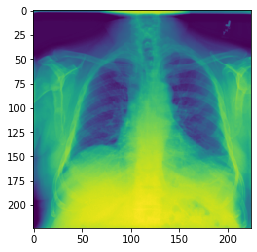

In [58]:
plt.imshow(train_dataset[0]['image'][0])

In [7]:
len(test_dataset)

7557

In [102]:
# label_dict = {}
# for i, sample in enumerate(train_dataset):
#     if sample['label'] in label_dict:
#         label_dict[sample['label']] += 1
#     else:
#         label_dict[sample['label']] = 1
        
label_dict = {0: 15546, 1: 7124}

In [103]:
arr  = []
weight = 0
def calculateWeights(label_dict):
    for label,count in label_dict.items():
        weight = count / len(train_dataset)
        arr.append(weight)
    return arr

In [104]:
weights = calculateWeights(label_dict) 
print(weights)
weights = torch.FloatTensor(weights).cuda()
print(weights)
sampler = torch.utils.data.sampler.WeightedRandomSampler(weights, 100,replacement = True)  

[0.6857520952801058, 0.3142479047198941]
tensor([0.6858, 0.3142], device='cuda:0')


# Parameters

In [66]:
BATCH_SIZE = 64

In [67]:
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE,
                            shuffle=True, num_workers=8)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE,
                            shuffle=True, num_workers=8)

# Model

## Image Network

In [71]:
import torch.nn.functional as F
class MyCNNModel(nn.Module):

    def __init__(self, in_channels=1):
        super(MyCNNModel, self).__init__()

        self.cnn = torchvision.models.resnet18(pretrained=True)
        self.cnn.fc = torch.nn.Linear(in_features=512, out_features=256)      
        self.cnn.conv1 = nn.Conv2d(in_channels, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        self.project = torch.nn.Linear(in_features=256, out_features=128)


    def forward(self, x):
        x = self.cnn(x)
        z = self.project(x)
        return x, z


my_cnn_model = MyCNNModel()

# Now this works just fine !

x = torch.randn((16,1,256,256))
output1, output2 = my_cnn_model(x)
print(output1.shape)
print(output2.shape)

torch.Size([16, 256])
torch.Size([16, 128])


## Finetune Layer: Linear Classifier

In [69]:
class MyClfModel(nn.Module):

    def __init__(self):
        super(MyClfModel, self).__init__()

        self.clf = nn.Sequential(nn.Linear(256, 2))

    def forward(self, x):
        x = self.clf(x)
#         x2 = self.radiomics(x2)
        return x


my_clf_model = MyClfModel()

# Now this works just fine !

x = torch.randn((16,256))
output = my_clf_model(x)
print(output.shape)

torch.Size([16, 2])


## Radiomics Network

In [70]:
class MyRadiomicsModel(nn.Module):

    def __init__(self, in_channels=1):
        super(MyRadiomicsModel, self).__init__()
        
        self.radiomics = nn.Sequential(nn.Linear(102, 64), nn.Linear(64, 128))

    def forward(self, x):
        x = self.radiomics(x)
        return x


my_radiomics_model = MyRadiomicsModel()

# Now this works just fine !

x = torch.randn((16,102))
output = my_radiomics_model(x)
print(output.shape)

torch.Size([16, 128])


## Contrastive Loss: NTXentLoss

In [72]:
import torch
import numpy as np


class NTXentLoss(torch.nn.Module):

    def __init__(self, device, temperature, use_cosine_similarity):
        super(NTXentLoss, self).__init__()
        self.temperature = temperature
        self.device = device
        self.softmax = torch.nn.Softmax(dim=-1)
        self.similarity_function = self._get_similarity_function(use_cosine_similarity)
        self.criterion = torch.nn.CrossEntropyLoss(reduction="sum")

    def _get_similarity_function(self, use_cosine_similarity):
        if use_cosine_similarity:
            self._cosine_similarity = torch.nn.CosineSimilarity(dim=-1)
            return self._cosine_simililarity
        else:
            return self._dot_simililarity

    def _get_correlated_mask(self, batch_size):
        diag = np.eye(2 * batch_size)
        l1 = np.eye((2 * batch_size), 2 * batch_size, k=-batch_size)
        l2 = np.eye((2 * batch_size), 2 * batch_size, k=batch_size)
        mask = torch.from_numpy((diag + l1 + l2))
        mask = (1 - mask).type(torch.bool)
        return mask.to(self.device)

    @staticmethod
    def _dot_simililarity(x, y):
        v = torch.tensordot(x.unsqueeze(1), y.T.unsqueeze(0), dims=2)
        # x shape: (N, 1, C)
        # y shape: (1, C, 2N)
        # v shape: (N, 2N)
        return v

    def _cosine_simililarity(self, x, y):
        # x shape: (N, 1, C)
        # y shape: (1, 2N, C)
        # v shape: (N, 2N)
        v = self._cosine_similarity(x.unsqueeze(1), y.unsqueeze(0))
        return v

    def forward(self, zis, zjs):
        batch_size = zis.shape[0]
        representations = torch.cat([zjs, zis], dim=0)

        similarity_matrix = self.similarity_function(representations, representations)

        # filter out the scores from the positive samples
        l_pos = torch.diag(similarity_matrix, batch_size)
        r_pos = torch.diag(similarity_matrix, -batch_size)
        positives = torch.cat([l_pos, r_pos]).view(2 * batch_size, 1)

        mask = self._get_correlated_mask(batch_size)
        negatives = similarity_matrix[mask].view(2 * batch_size, -1)

        logits = torch.cat((positives, negatives), dim=1)
        logits /= self.temperature

        labels = torch.zeros(2 * batch_size).to(self.device).long()
        loss = self.criterion(logits, labels)

        return loss / (2 * batch_size)

## Loss and Optimizer

In [73]:
criterion = NTXentLoss('cuda', temperature=0.5, use_cosine_similarity=True)
optimizer_image = optim.Adam(my_cnn_model.parameters(), lr=1e-3, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-5)
optimizer_radiomics = optim.Adam(my_radiomics_model.parameters(), lr=1e-3, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-5)

lr_scheduler_image = lr_scheduler.StepLR(optimizer_image, step_size=5, gamma=0.1)
lr_scheduler_radiomics = lr_scheduler.StepLR(optimizer_radiomics, step_size=5, gamma=0.1)

In [75]:
my_cnn_model = my_cnn_model.cuda()
my_radiomics_model = my_radiomics_model.cuda()

## Pretraining 

In [81]:
num_epochs = 20
def pretrain():
    history = []
    for epoch in range(num_epochs):
            since = time.time()
            print('Epoch {}/{}'.format(epoch , num_epochs - 1))
            print('-' * 10)
            #set the mode of model
            lr_scheduler_image.step()  #about lr and gamma
            lr_scheduler_radiomics.step()

            my_cnn_model.train()  #set model to training mode
            my_radiomics_model.train()

            #load clf model
        
            running_loss = 0.0
            #Iterate over data
            for i, sample in enumerate(train_loader):
                sample['image'] = torch.autograd.Variable(sample['image'].cuda())
                sample['radiomics'] = torch.autograd.Variable(sample['radiomics'].cuda())
                optimizer_image.zero_grad()
                optimizer_radiomics.zero_grad()

                # compute output
                xi, zi = my_cnn_model(sample['image'])
                zr = my_radiomics_model(sample['radiomics'])
                
                # normalize projection features vectors
                zi = torch.nn.functional.normalize(zi, dim=1)
                zr = torch.nn.functional.normalize(zr, dim=1)

                # loss
                loss = criterion(zi, zr)


                if ((i+1)%100) == 0: 
                    print('step: {} loss: {loss:.3f}'.format(i, loss = loss.mean()))

                loss.backward() 
                optimizer_image.step()
                optimizer_radiomics.step()

                #print(loss.data.item())
                running_loss += loss.data.item()
                #break
                '''
                if i == 40:
                    print('break')
                    break
                '''

            epoch_loss = float(running_loss) / float(i)
            print(' Epoch over  Loss: {:.5f}'.format(epoch_loss))
            history.append(epoch_loss)

            time_elapsed = time.time() - since
            print('Training one epoch complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60 , time_elapsed % 60))
    return history

In [82]:
import warnings
warnings.filterwarnings('ignore')

pretrain()

Epoch 0/19
----------
step: 99 loss: 3.380
step: 199 loss: 3.475
step: 299 loss: 3.400
 Epoch over  Loss: 3.41154
Training one epoch complete in 1m 6s
Epoch 1/19
----------
step: 99 loss: 3.380
step: 199 loss: 3.419
step: 299 loss: 3.383
 Epoch over  Loss: 3.38578
Training one epoch complete in 1m 6s
Epoch 2/19
----------
step: 99 loss: 3.394
step: 199 loss: 3.384
step: 299 loss: 3.396
 Epoch over  Loss: 3.38347
Training one epoch complete in 1m 6s
Epoch 3/19
----------
step: 99 loss: 3.375
step: 199 loss: 3.344
step: 299 loss: 3.331
 Epoch over  Loss: 3.37913
Training one epoch complete in 1m 6s
Epoch 4/19
----------
step: 99 loss: 3.455
step: 199 loss: 3.378
step: 299 loss: 3.395
 Epoch over  Loss: 3.37664
Training one epoch complete in 1m 7s
Epoch 5/19
----------
step: 99 loss: 3.343
step: 199 loss: 3.351
step: 299 loss: 3.373
 Epoch over  Loss: 3.37518
Training one epoch complete in 1m 6s
Epoch 6/19
----------
step: 99 loss: 3.335
step: 199 loss: 3.330
step: 299 loss: 3.378
 Epoch 

[3.4115441188973894,
 3.385781006961219,
 3.383472702597494,
 3.379132119612505,
 3.3766374971907016,
 3.3751771200848166,
 3.370478246171596,
 3.3699917251107383,
 3.3678748193433727,
 3.368083859904338,
 3.3678749311441756,
 3.368412482536445,
 3.368294574109848,
 3.366961453594057,
 3.3680054686837275,
 3.367762508365394,
 3.367418795318927,
 3.368551983671673,
 3.3683630106812816,
 3.370082461901304]

## Finetune and Testing

In [85]:
optimizer_image = optim.Adam(my_cnn_model.parameters(), lr=1e-5, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-5)
lr_scheduler_image = lr_scheduler.StepLR(optimizer_image, step_size=5, gamma=0.1)

optimizer_clf = optim.Adam(my_clf_model.parameters(), lr=1e-5, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-5)
lr_scheduler_clf = lr_scheduler.StepLR(optimizer_clf, step_size=5, gamma=0.1)
my_clf_model = my_clf_model.cuda()

In [105]:
num_epochs = 30
criterion = nn.CrossEntropyLoss(weight=weights)
def finetune():
    history = []
    for epoch in range(num_epochs):
            since = time.time()
            print('Epoch {}/{}'.format(epoch , num_epochs - 1))
            print('-' * 10)
            #set the mode of model
            lr_scheduler_clf.step()  #about lr and gamma

            my_cnn_model.train()  #set model to eval mode
            my_clf_model.train()

            #load clf model
        
            running_loss = 0.0
            #Iterate over data
            for i, sample in enumerate(train_loader):
                sample['image'] = torch.autograd.Variable(sample['image'].cuda())
                sample['label'] = torch.autograd.Variable(sample['label'].cuda())
                optimizer_image.zero_grad()
                optimizer_clf.zero_grad()

                # compute output
                xi, zi = my_cnn_model(sample['image'])
                predict_label = my_clf_model(xi)
                
                # loss
                loss = criterion(predict_label, sample['label'])


                if ((i+1)%100) == 0: 
                    print('step: {} loss: {loss:.3f}'.format(i, loss = loss.mean()))

                loss.backward() 
                optimizer_image.step()
                optimizer_clf.step()

                #print(loss.data.item())
                running_loss += loss.data.item()
                #break
                '''
                if i == 40:
                    print('break')
                    break
                '''

            epoch_loss = float(running_loss) / float(i)
            print(' Epoch over  Loss: {:.5f}'.format(epoch_loss))
            history.append(epoch_loss)
            

            print('*******testing!*********')
            test(my_cnn_model, my_clf_model, test_loader)
            #break

            time_elapsed = time.time() - since
            print('Training one epoch complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60 , time_elapsed % 60))
    return history

In [106]:
def test(my_cnn_model, my_clf_model, test_loader):

    # switch to evaluate mode
    my_cnn_model.eval()
    my_clf_model.eval()

    running_corrects = 0
    total_samples = 0
    for i, sample in enumerate(test_loader):
        with torch.no_grad():
#             if i % 100 == 0:
#                 print('testing process:',i)
            label = sample['label'].cuda()
    
#             label = label.unsqueeze(1)

            input_image = torch.autograd.Variable(sample['image'].cuda())
            #output = model_global(input_var)

            output_image, _ = my_cnn_model(input_image)

            output_label = my_clf_model(output_image)
            
#             pred = torch.round(output)
            
            _, pred = torch.max(output_label, dim=1)
            running_corrects += torch.sum(pred == label).item()
            total_samples += len(label)
            
    epoch_acc = running_corrects / total_samples
            
    print(' Epoch Acc: {:.5f}'.format(epoch_acc))
    return

In [107]:
import warnings
warnings.filterwarnings('ignore')
finetune()

Epoch 0/29
----------
step: 99 loss: 0.197
step: 199 loss: 0.243
step: 299 loss: 0.180
 Epoch over  Loss: 0.31171
*******testing!*********
 Epoch Acc: 0.81395
Training one epoch complete in 1m 28s
Epoch 1/29
----------
step: 99 loss: 0.255
step: 199 loss: 0.203
step: 299 loss: 0.126
 Epoch over  Loss: 0.20406
*******testing!*********
 Epoch Acc: 0.82189
Training one epoch complete in 1m 27s
Epoch 2/29
----------
step: 99 loss: 0.173
step: 199 loss: 0.182
step: 299 loss: 0.135
 Epoch over  Loss: 0.19214
*******testing!*********
 Epoch Acc: 0.81884
Training one epoch complete in 1m 28s
Epoch 3/29
----------
step: 99 loss: 0.166
step: 199 loss: 0.111
step: 299 loss: 0.094
 Epoch over  Loss: 0.18269
*******testing!*********
 Epoch Acc: 0.82400
Training one epoch complete in 1m 28s
Epoch 4/29
----------
step: 99 loss: 0.205
step: 199 loss: 0.160
step: 299 loss: 0.203
 Epoch over  Loss: 0.17368
*******testing!*********
 Epoch Acc: 0.82572
Training one epoch complete in 1m 28s
Epoch 5/29
----

[0.31171482026913744,
 0.20405525893057133,
 0.19214150098041963,
 0.18269397470952764,
 0.1736806161322836,
 0.16510736779178267,
 0.1573211718455883,
 0.14730899519481733,
 0.13868236336541379,
 0.13091156413873373,
 0.12242512538566092,
 0.11359483364569602,
 0.10534557216079896,
 0.09848033175882646,
 0.08921617772535416,
 0.08170673737860164,
 0.07655811691551474,
 0.06827388012434467,
 0.06209344846475343,
 0.05689129609309432,
 0.04925799454657077,
 0.046275891733255844,
 0.04057429355074583,
 0.03984718362927058,
 0.030745270211146987,
 0.02850332204088053,
 0.024929513188281575,
 0.020932259729676644,
 0.018371020749081084,
 0.017297171721876847]

# Without Radiomics

In [9]:
import torch.nn.functional as F
class MyCNN2Model(nn.Module):

    def __init__(self, in_channels=1):
        super(MyCNN2Model, self).__init__()

        self.cnn = torchvision.models.resnet18(pretrained=True)
        self.cnn.fc = torch.nn.Linear(in_features=512, out_features=19)      
        self.cnn.conv1 = nn.Conv2d(in_channels, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)


    def forward(self, x):
        x = self.cnn(x)
        return x


my_cnn2_model = MyCNN2Model()

# Now this works just fine !

x = torch.randn((16,1,256,256))
output = my_cnn2_model(x)
print(output.shape)

torch.Size([16, 19])


In [10]:
class MyClf3Model(nn.Module):

    def __init__(self):
        super(MyClf3Model, self).__init__()

        self.clf = nn.Sequential(nn.Linear(19, 2))

    def forward(self, x):
        x = self.clf(x)
#         x2 = self.radiomics(x2)
        return x


my_clf3_model = MyClf3Model()

# Now this works just fine !

x = torch.randn((16,19))
output = my_clf3_model(x)
print(output.shape)

torch.Size([16, 2])


In [11]:
criterion = nn.CrossEntropyLoss()

optimizer_cnn2 = optim.Adam(my_cnn2_model.parameters(), lr=LR, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-5)

# Decay LR by a factor of 0.1 every 10 epochs
lr_scheduler_cnn2 = lr_scheduler.StepLR(optimizer_cnn2, step_size=5, gamma=0.1)

optimizer_clf3 = optim.Adam(my_clf3_model.parameters(), lr=LR, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-5)

# Decay LR by a factor of 0.1 every 10 epochs
lr_scheduler_clf3 = lr_scheduler.StepLR(optimizer_clf3, step_size=5, gamma=0.1)

In [12]:
my_cnn2_model = my_cnn2_model.cuda()
my_clf3_model = my_clf3_model.cuda()

In [15]:
num_epochs = 30
def train_cnn_only():
    for epoch in range(num_epochs):
            since = time.time()
            print('Epoch {}/{}'.format(epoch , num_epochs - 1))
            print('-' * 10)
            #set the mode of model
            lr_scheduler_cnn2.step()  #about lr and gamma
#             lr_scheduler_radiomics.step()
            lr_scheduler_clf3.step()
            my_cnn2_model.train()  #set model to training mode
#             my_radiomics_model.train()
            my_clf3_model.train()

            running_loss = 0.0
            #Iterate over data
            for i, sample in enumerate(train_loader):
                sample['image'] = torch.autograd.Variable(sample['image'].cuda())
#                 sample['radiomics'] = torch.autograd.Variable(sample['radiomics'].cuda())
                sample['label'] = torch.autograd.Variable(sample['label'].cuda())
                optimizer_cnn2.zero_grad()
                optimizer_clf3.zero_grad()
#                 optimizer_radiomics.zero_grad()

                # compute output
                output_image = my_cnn2_model(sample['image'])
#                 features = torch.cat((output, sample['radiomics']), 1)
                outputs = my_clf3_model(output_image)

                # loss
#                 loss1 = criterion1(output_image, output_radiomics)
#                 loss2 = criterion1(output_radiomics, output_image)
                loss3 = criterion(outputs, sample['label'])
                #

#                 loss = loss1.mean()*0.5 + loss2.mean()*0.2 + loss3*0.3
                loss = loss3

                if (i%100) == 0: 
                    print('step: {} totalloss: {loss:.3f}'.format(i, loss = loss))

                loss.backward() 
                nn.utils.clip_grad_value_(my_cnn2_model.parameters(), 0.1)
                optimizer_cnn2.step()
                optimizer_clf3.step()
#                 optimizer_radiomics.step()

                #print(loss.data.item())
                running_loss += loss.data.item()
                #break
                '''
                if i == 40:
                    print('break')
                    break
                '''

            epoch_loss = float(running_loss) / float(i)
            print(' Epoch over  Loss: {:.5f}'.format(epoch_loss))
            

            print('*******testing!*********')
            test_cnn_only(my_cnn2_model, my_clf3_model, test_loader)
            #break

            #save
#             if epoch % 1 == 0:
#                 save_path = save_model_path
#                 torch.save(my_cnn2_model.state_dict(), save_path+save_model_name+'_cnn2'+'_epoch_'+str(epoch)+'.pkl')
#                 print('my_cnn2_model already save!')
#                 torch.save(my_clf3_model.state_dict(), save_path+save_model_name+'_clf3'+'_epoch_'+str(epoch)+'.pkl')
#                 print('my_clf3_model already save!')
# #                 torch.save(my_radiomics_model.state_dict(), save_path+save_model_name+'_radiomics'+'_epoch_'+str(epoch)+'.pkl')            
# #                 print('my_radiomics_model already save!')

            time_elapsed = time.time() - since
            print('Training one epoch complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60 , time_elapsed % 60))

In [14]:
def test_cnn_only(my_cnn2_model, my_clf3_model, test_loader):

    # switch to evaluate mode
    my_cnn2_model.eval()
    my_clf3_model.eval()

    running_corrects = 0
    total_samples = 0
    for i, sample in enumerate(test_loader):
        with torch.no_grad():
#             if i % 100 == 0:
#                 print('testing process:',i)
            label = sample['label'].cuda()
    
#             label = label.unsqueeze(1)

            input_image = torch.autograd.Variable(sample['image'].cuda())
#             sample['radiomics'] = torch.autograd.Variable(sample['radiomics'].cuda())
            #output = model_global(input_var)

            output_image = my_cnn2_model(input_image)
            
#             features = torch.cat((output, sample['radiomics']), 1)
            outputs = my_clf3_model(output_image)
            
#             pred = torch.round(outputs)
            
            _, pred = torch.max(outputs, dim=1)
            running_corrects += torch.sum(pred == label).item()
            total_samples += len(label)
            
    epoch_acc = running_corrects / total_samples
            
    print(' Epoch Acc: {:.5f}'.format(epoch_acc))
    return

In [18]:
train_cnn_only()

Epoch 0/29
----------
step: 0 totalloss: 1127897628672.000
step: 100 totalloss: 1997210255360.000
step: 200 totalloss: 722805653504.000
step: 300 totalloss: 497305092096.000
step: 400 totalloss: 3525791711232.000
step: 500 totalloss: 2137658490880.000
step: 600 totalloss: 319604916224.000
step: 700 totalloss: 643543334912.000
 Epoch over  Loss: 1934091789777.71753
*******testing!*********
 Epoch Acc: 0.32169
my_cnn2_model already save!
my_clf3_model already save!
Training one epoch complete in 1m 41s
Epoch 1/29
----------
step: 0 totalloss: 5307953053696.000
step: 100 totalloss: 7759817342976.000
step: 200 totalloss: 356326735872.000
step: 300 totalloss: 845494484992.000
step: 400 totalloss: 1149942366208.000
step: 500 totalloss: 134549389312.000
step: 600 totalloss: 1894433554432.000
step: 700 totalloss: 2412544262144.000
 Epoch over  Loss: 1992307900209.17505
*******testing!*********
 Epoch Acc: 0.67831
my_cnn2_model already save!
my_clf3_model already save!
Training one epoch comple

 Epoch over  Loss: 1590.64904
*******testing!*********
 Epoch Acc: 0.60156
my_cnn2_model already save!
my_clf3_model already save!
Training one epoch complete in 1m 41s
Epoch 18/29
----------
step: 0 totalloss: 355.730
step: 100 totalloss: 172.532
step: 200 totalloss: 198.762
step: 300 totalloss: 229.816
step: 400 totalloss: 657.387
step: 500 totalloss: 389.793
step: 600 totalloss: 235.412
step: 700 totalloss: 716.561
 Epoch over  Loss: 262.09809
*******testing!*********
 Epoch Acc: 0.57615
my_cnn2_model already save!
my_clf3_model already save!
Training one epoch complete in 1m 42s
Epoch 19/29
----------
step: 0 totalloss: 388.593
step: 100 totalloss: 180.716
step: 200 totalloss: 236.423
step: 300 totalloss: 102.615
step: 400 totalloss: 82.512
step: 500 totalloss: 1107.367
step: 600 totalloss: 636.226
step: 700 totalloss: 139.969
 Epoch over  Loss: 224.12421
*******testing!*********
 Epoch Acc: 0.73323
my_cnn2_model already save!
my_clf3_model already save!
Training one epoch complete

# Just Radiomics

In [112]:
class MyLRModel(nn.Module):

    def __init__(self, in_channels=1):
        super(MyLRModel, self).__init__()
        
        self.radiomics = nn.Sequential(nn.Linear(19, 2))

    def forward(self, x):
        x = self.radiomics(x)
        return x


my_LR_model = MyLRModel()

# Now this works just fine !

x = torch.randn((16,19))
output = my_LR_model(x)
print(output.shape)

torch.Size([16, 2])


In [113]:
criterion = nn.CrossEntropyLoss()

optimizer_LR = optim.Adam(my_LR_model.parameters(), lr=LR, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-5)

# Decay LR by a factor of 0.1 every 10 epochs
lr_scheduler_LR = lr_scheduler.StepLR(optimizer_LR, step_size=5, gamma=0.1)

In [114]:
my_LR_model = my_LR_model.cuda()

In [115]:
def train_LR():
    for epoch in range(10):
            since = time.time()
            print('Epoch {}/{}'.format(epoch , 9))
            print('-' * 10)
            #set the mode of model
            lr_scheduler_LR.step()  #about lr and gamma
#             lr_scheduler_radiomics.step()
#             lr_scheduler_clf.step()
            my_LR_model.train()  #set model to training mode
#             my_radiomics_model.train()
#             my_clf_model.train()

            running_loss = 0.0
            #Iterate over data
            for i, sample in enumerate(train_loader):
#                 sample['image'] = torch.autograd.Variable(sample['image'].cuda())
                sample['radiomics'] = torch.autograd.Variable(sample['radiomics'].cuda())
                sample['label'] = torch.autograd.Variable(sample['label'].cuda())
                optimizer_LR.zero_grad()
#                 optimizer_clf.zero_grad()
#                 optimizer_radiomics.zero_grad()

                # compute output
                output = my_LR_model(sample['radiomics'])

                # loss
#                 loss1 = criterion1(output_image, output_radiomics)
#                 loss2 = criterion1(output_radiomics, output_image)
                loss3 = criterion(output, sample['label'])
                #

#                 loss = loss1.mean()*0.5 + loss2.mean()*0.2 + loss3*0.3
                loss = loss3

                if (i%100) == 0: 
                    print('step: {} totalloss: {loss:.3f}'.format(i, loss = loss))

                loss.backward() 
#                 nn.utils.clip_grad_value_(my_cnn2_model.parameters(), 0.1)
                optimizer_LR.step()
#                 optimizer_clf.step()
#                 optimizer_radiomics.step()

                #print(loss.data.item())
                running_loss += loss.data.item()
                #break
                '''
                if i == 40:
                    print('break')
                    break
                '''

            epoch_loss = float(running_loss) / float(i)
            print(' Epoch over  Loss: {:.5f}'.format(epoch_loss))
            

            print('*******testing!*********')
            test_LR(my_LR_model, test_loader)
            #break

            #save
#             if epoch % 1 == 0:
#                 save_path = save_model_path
#                 torch.save(my_LR_model.state_dict(), save_path+save_model_name+'_LR'+'_epoch_'+str(epoch)+'.pkl')
#                 print('my_LR_model already save!')
# #                 torch.save(my_clf_model.state_dict(), save_path+save_model_name+'_clf'+'_epoch_'+str(epoch)+'.pkl')
# #                 print('my_clf_model already save!')
# #                 torch.save(my_radiomics_model.state_dict(), save_path+save_model_name+'_radiomics'+'_epoch_'+str(epoch)+'.pkl')            
# #                 print('my_radiomics_model already save!')

            time_elapsed = time.time() - since
            print('Training one epoch complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60 , time_elapsed % 60))

In [116]:
def test_LR(my_LR_model, test_loader):
    my_LR_model.eval()

    running_corrects = 0
    total_samples = 0
    for i, sample in enumerate(test_loader):
        with torch.no_grad():
#             if i % 100 == 0:
#                 print('testing process:',i)
            label = sample['label'].cuda()

#             input_image = torch.autograd.Variable(sample['image'].cuda())
            sample['radiomics'] = torch.autograd.Variable(sample['radiomics'].cuda())
            #output = model_global(input_var)

            output = my_LR_model(sample['radiomics'])
            
            _, pred = torch.max(output, dim=1)
            running_corrects += torch.sum(pred == label).item()
            total_samples += len(label)
            
    epoch_acc = running_corrects / total_samples
            
    print(' Epoch Acc: {:.5f}'.format(epoch_acc))
    return    

In [117]:
train_LR()

Epoch 0/9
----------
step: 0 totalloss: 0.642
step: 100 totalloss: 0.000
step: 200 totalloss: 0.000
step: 300 totalloss: 0.000
step: 400 totalloss: 0.000
step: 500 totalloss: 0.000
step: 600 totalloss: 0.000
step: 700 totalloss: 0.000
 Epoch over  Loss: 128.19518
*******testing!*********
 Epoch Acc: 0.95858
my_LR_model already save!
Training one epoch complete in 1m 39s
Epoch 1/9
----------
step: 0 totalloss: 15.754
step: 100 totalloss: 0.000
step: 200 totalloss: 0.000
step: 300 totalloss: 0.000
step: 400 totalloss: 86.536
step: 500 totalloss: 146.604
step: 600 totalloss: 0.000
step: 700 totalloss: 0.000
 Epoch over  Loss: 126.29871
*******testing!*********
 Epoch Acc: 0.99921
my_LR_model already save!
Training one epoch complete in 1m 39s
Epoch 2/9
----------
step: 0 totalloss: 0.000
step: 100 totalloss: 16.187
step: 200 totalloss: 0.000
step: 300 totalloss: 0.000
step: 400 totalloss: 0.000
step: 500 totalloss: 0.000
step: 600 totalloss: 0.000
step: 700 totalloss: 12.618
 Epoch over  

KeyboardInterrupt: 